### Q2: Do masterclass exercise 1. The unbiased simulations should run in about 2 minutes on 1 cpu
1) Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals. 
2) Use mdtraj to compute the phi and psi dihedrals from the output xtc file. Plot them on top of the ones from the COLVAR file, making sure they agree! 
3) I suggest you plot phi vs psi with plt.scatter to get a ramachandran-like plot instead of looking vs time. 
4) Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.

In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

### 1) Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals. 

In [2]:
with open('../Inputs/Q2/A/COLVAR', 'r') as file:
    content = file.read()
    print(content)

#! FIELDS time phi psi
#! SET min_phi -pi
#! SET max_phi pi
#! SET min_psi -pi
#! SET max_psi pi
 0.000000 -1.257768 2.877951
 1.000000 -2.714986 2.432860
 2.000000 -2.332921 2.672415
 3.000000 -2.010501 2.706560
 4.000000 -1.848329 2.401884
 5.000000 -2.311322 2.271704
 6.000000 -2.479165 3.134684
 7.000000 -2.227371 2.872352
 8.000000 -1.770587 2.073850
 9.000000 -1.154633 0.989987
 10.000000 -1.314789 0.595705
 11.000000 -1.345905 0.913816
 12.000000 -1.476966 1.351331
 13.000000 -1.125794 0.933958
 14.000000 -1.723417 1.023410
 15.000000 -1.368534 1.007090
 16.000000 -1.601554 1.297369
 17.000000 -1.209687 1.276543
 18.000000 -1.526391 0.975525
 19.000000 -1.154937 0.736471
 20.000000 -1.455543 1.067487
 21.000000 -1.607478 1.568858
 22.000000 -1.333484 1.331633
 23.000000 -1.635441 1.133444
 24.000000 -2.149367 0.732512
 25.000000 -1.643266 0.710983
 26.000000 -1.756595 0.928393
 27.000000 -1.451166 1.372731
 28.000000 -1.280874 1.521085
 29.000000 -1.732165 1.581852
 30.000000 -1

In [3]:
time_A, phi_A, psi_A =np.loadtxt('/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/A/COLVAR', skiprows=5, unpack=True)
time_B, phi_B, psi_B =np.loadtxt('/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/B/COLVAR', skiprows=5, unpack=True)

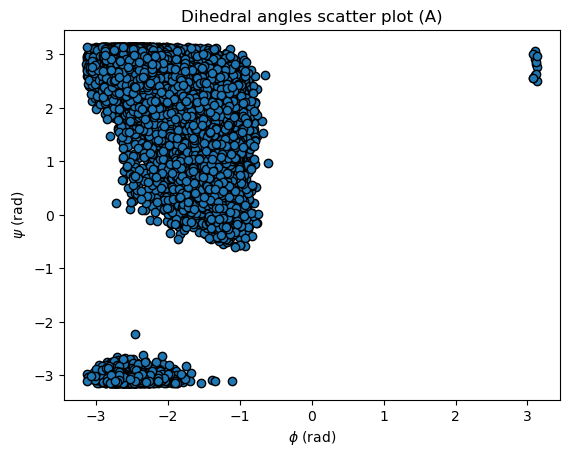

In [13]:
fig=plt.figure(1)
plt.scatter(phi_A, psi_A, edgecolors="black")
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')
plt.title("Dihedral angles scatter plot (A)")
plt.savefig("../Figures/Q2_A_DihedralAngles_COLVAR.png",format="png")

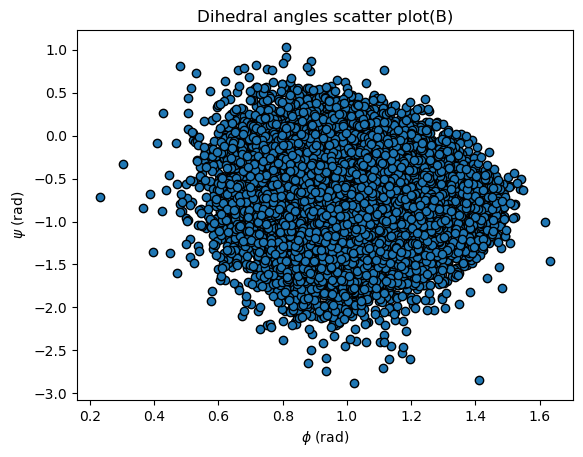

In [14]:
# Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals. 
fig=plt.figure(2)
plt.scatter(phi_B, psi_B, edgecolors="black")
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')
plt.title("Dihedral angles scatter plot(B)")
plt.savefig("../Figures/Q2_B_DihedralAngles_COLVAR.png",format="png")

### 2) Use mdtraj to compute the phi and psi dihedrals from the output xtc file. Plot them on top of the ones from the COLVAR file, making sure they agree! 

In [7]:
# load the Dihedral Angles data from xtc file and check
# trajectory files
xtc_file_A='/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/A/traj_comp.xtc'
xtc_file_B='/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/B/traj_comp.xtc'
# topology files
gro_file_A = '/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/A/confout.gro'
gro_file_B = '/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q2/B/confout.gro'
# load trajectory
traj_A = md.load(xtc_file_A, top=gro_file_A)
traj_B = md.load(xtc_file_B, top=gro_file_B)

print(traj_A)
print(traj_A.xyz.shape)
print(traj_A.xyz[0])

<mdtraj.Trajectory with 100001 frames, 22 atoms, 3 residues, and unitcells>
(100001, 22, 3)
[[2.0900002  1.2650001  1.22      ]
 [2.         1.2240001  1.174     ]
 [1.9440001  1.3160001  1.1580001 ]
 [1.9470001  1.1550001  1.24      ]
 [2.038      1.1520001  1.046     ]
 [2.1560001  1.139      1.014     ]
 [1.9380001  1.11       0.96800005]
 [1.8440001  1.125      1.001     ]
 [1.9520001  1.059      0.83300006]
 [2.029      0.98300004 0.82000005]
 [1.8160001  0.99200004 0.81000006]
 [1.7990001  0.92100006 0.89100003]
 [1.7400001  1.07       0.80100006]
 [1.82       0.93700004 0.716     ]
 [1.9860001  1.1700001  0.735     ]
 [1.978      1.2880001  0.768     ]
 [2.0310001  1.128      0.61700004]
 [2.052      1.029      0.61300004]
 [2.0440001  1.205      0.49400002]
 [1.9440001  1.2240001  0.45400003]
 [2.101      1.297      0.504     ]
 [2.089      1.143      0.41700003]]


(100001, 1)
(100001, 1)
(100001, 1)
(100001, 1)


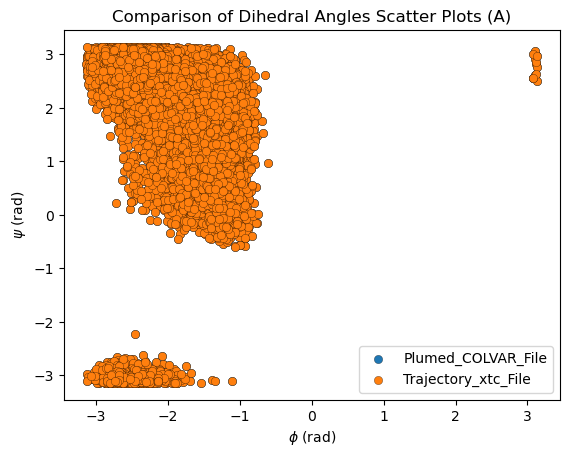

In [16]:
# compute phi and psi from trajectory and check
# to be mentioned, the (phi_A, psi_A, phi_B, psi_B) are loaded from Plumed COLVAR File,
# So we use (A_phi, A_psi, B_phi, B_psi) to represent the dihedrals computed from trajectory xtc files
A_phi = md.compute_phi(traj_A)[1]
A_psi = md.compute_psi(traj_A)[1]
B_phi = md.compute_phi(traj_B)[1]
B_psi = md.compute_psi(traj_B)[1]
print(A_phi.shape)
print(A_psi.shape)
print(B_phi.shape)
print(B_psi.shape)
A_phi


# plot phi_vs_psi from Metastable State A
fig=plt.figure(3)
plt.scatter(phi_A, psi_A, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.scatter(A_phi, A_psi, edgecolors="black",linewidths=0.2, label='Trajectory_xtc_File')
plt.legend()
# set all labels
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')
# set titles
plt.title("Comparison of Dihedral Angles Scatter Plots (A)")
# save figure
plt.savefig("../Figures/ADP_MetaStateA_DihedralAngles_Comparison_A.png",format="png")
plt.show()

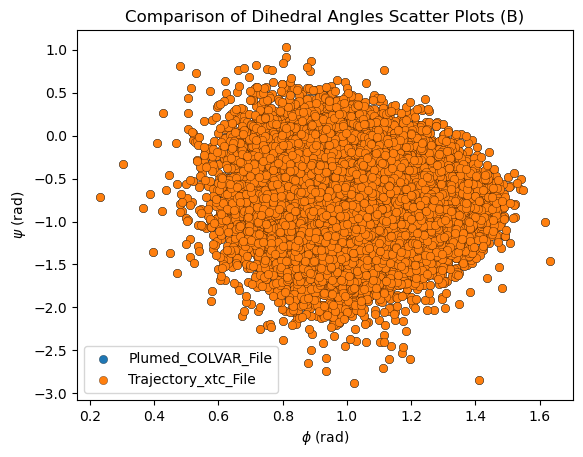

In [17]:
# plot phi_vs_psi from Metastable State B
fig=plt.figure(4)
plt.scatter(phi_B, psi_B, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.scatter(B_phi, B_psi, edgecolors="black",linewidths=0.2, label='Trajectory_xtc_File')
plt.legend()
# set all labels
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')
# set titles
plt.title("Comparison of Dihedral Angles Scatter Plots (B)")
# save figure
plt.savefig("../Figures/ADP_MetaStateA_DihedralAngles_Comparison_B.png",format="png")
plt.show()

### 3) Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.

In [18]:
# For meta state A
# compute standard deviation of the Dihedral Angle
std_phi_A_colvar = np.std(phi_A)
std_phi_A_xtc = np.std(A_phi)
std_psi_A_colvar = np.std(psi_A)
std_psi_A_xtc = np.std(A_psi)

# For meta state B
# compute standard deviation of the Dihedral Angles
std_phi_B_colvar = np.std(phi_B)
std_phi_B_xtc = np.std(B_phi)
std_psi_B_colvar = np.std(psi_B)
std_psi_B_xtc = np.std(B_psi)

print(" standard deviation of phi for meta state A:  ",std_phi_A_colvar,std_phi_A_xtc, " difference:",std_phi_A_colvar-std_phi_A_xtc)
print(" standard deviation of psi for meta state A:  ",std_psi_A_colvar,std_psi_A_xtc, " difference:",std_psi_A_colvar-std_psi_A_xtc)
print(" standard deviation of phi for meta state B:  ",std_phi_B_colvar,std_phi_B_xtc, " difference:",std_phi_B_colvar-std_phi_B_xtc)
print(" standard deviation of psi for meta state B:  ",std_psi_B_colvar,std_psi_B_xtc, " difference:",std_psi_B_colvar-std_psi_B_xtc)
print(" the differences were too small, so we could say they are the same. ") 

 standard deviation of phi for meta state A:   0.5538315442462007 0.5538316  difference: -3.3054824655209813e-08
 standard deviation of psi for meta state A:   1.024898119742263 1.024898  difference: 6.752668690879204e-08
 standard deviation of phi for meta state B:   0.1323817662350665 0.13238177  difference: -7.994641337827346e-10
 standard deviation of psi for meta state B:   0.34453442436874376 0.34453443  difference: -2.5588227647865835e-09
 the differences were too small, so we could say they are the same. 
